In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import librosa
from scipy.signal import argrelextrema

In [2]:
segment_dir = 'segment'

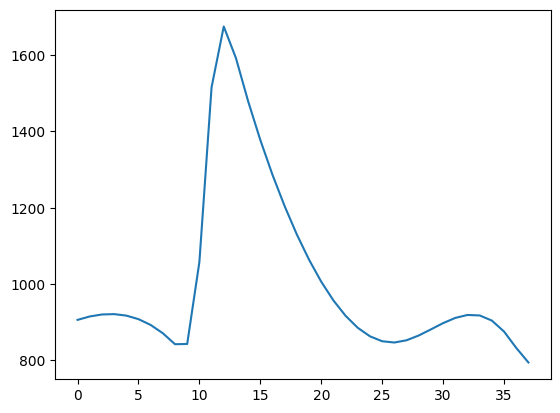

In [36]:
j = 0
for segment1_name in os.listdir(segment_dir):
    if j < 16:
        j += 1
        continue
    x_segment = np.load(os.path.join(segment_dir, segment1_name))

    #plt.plot(x_segment)
    #plt.show()

    local_maxima = argrelextrema(x_segment, np.greater)[0]
    local_minima = argrelextrema(x_segment, np.less)[0]
    x_points = np.concatenate([local_maxima, local_minima])
    if not len(x_points):
        continue
        
    x_points = np.sort(x_points)

    x = x_segment[x_points]

    i = 0
    cost = np.inf
    for segment2_name in os.listdir(segment_dir):
        y_segment = np.load(os.path.join(segment_dir, segment2_name))

        local_maxima = argrelextrema(y_segment, np.greater)[0]
        local_minima = argrelextrema(y_segment, np.less)[0]
        y_points = np.concatenate([local_maxima, local_minima])
        y_points = np.sort(y_points)

        if len(x_points) != len(y_points):
            continue

        y = y_segment[y_points]


        if np.any(abs(x - y) > 50):
            continue

        plt.plot(y_segment)
        plt.show()

        #print(y)
    break